In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("rent_right_data.csv")
data.head()

,type,area,bed,bath,toilet,price
0,flat / apartment,Maryland,2,2,2,1000000
1,detached duplex,Lekki,5,5,6,4000000
2,detached duplex,Lekki,4,4,5,3500000
3,terraced duplex,Ikeja,4,4,5,5500000
4,semi detached duplex,Lekki,4,4,5,4000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    731 non-null    object
 1   area    731 non-null    object
 2   bed     731 non-null    int64 
 3   bath    731 non-null    int64 
 4   toilet  731 non-null    int64 
 5   price   731 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 34.4+ KB


In [4]:
data.describe()

,bed,bath,toilet,price
count,731.000000,731.000000,731.000000,7.310000e+02
mean,3.233926,3.272230,4.030096,8.701933e+06
std,1.016978,1.047388,1.197794,1.510336e+07
min,1.000000,1.000000,1.000000,2.500000e+04
25%,3.000000,3.000000,3.000000,3.000000e+06
50%,3.000000,3.000000,4.000000,6.000000e+06
75%,4.000000,4.000000,5.000000,1.000000e+07
max,7.000000,7.000000,8.000000,2.200000e+08


In [5]:
data.shape

(731, 6)

In [6]:
# Check if there are any null values
data.isnull().sum()

type      0
area      0
bed       0
bath      0
toilet    0
price     0
dtype: int64

<AxesSubplot:>

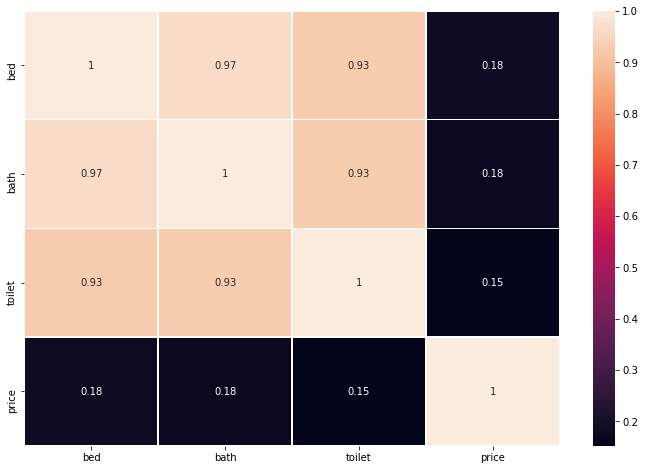

In [7]:
#VISUALIZATION
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, annot=True,  linewidths=.6, ax = ax)

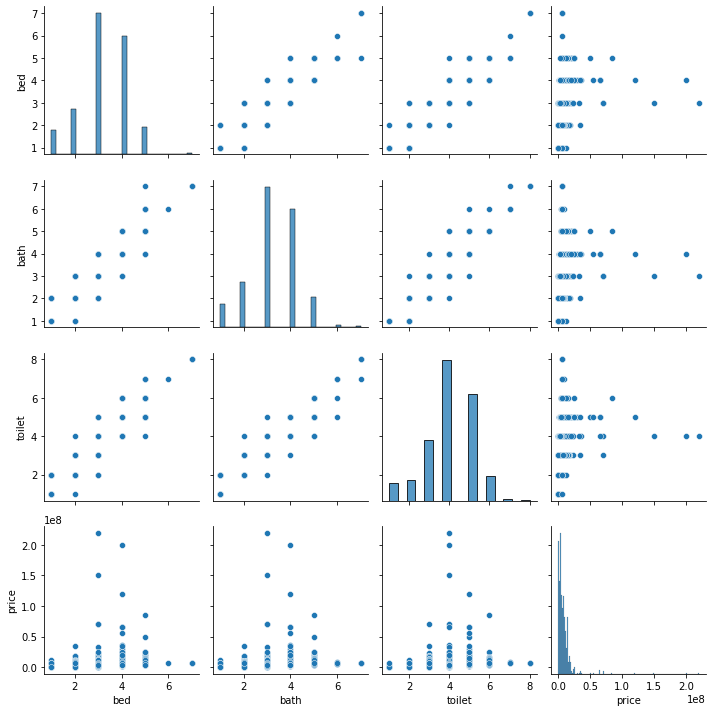

In [8]:
%matplotlib inline

# Calculate and show pairplot
sns.pairplot(data, height=2.5)
plt.tight_layout()

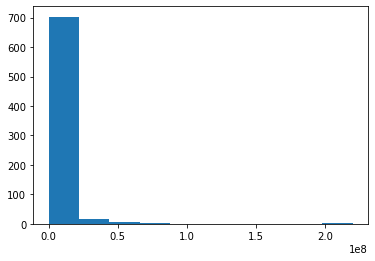

In [9]:
# Visualizing house prices
plt.hist(data['price'])
plt.show()

C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

<AxesSubplot:xlabel='toilet', ylabel='count'>

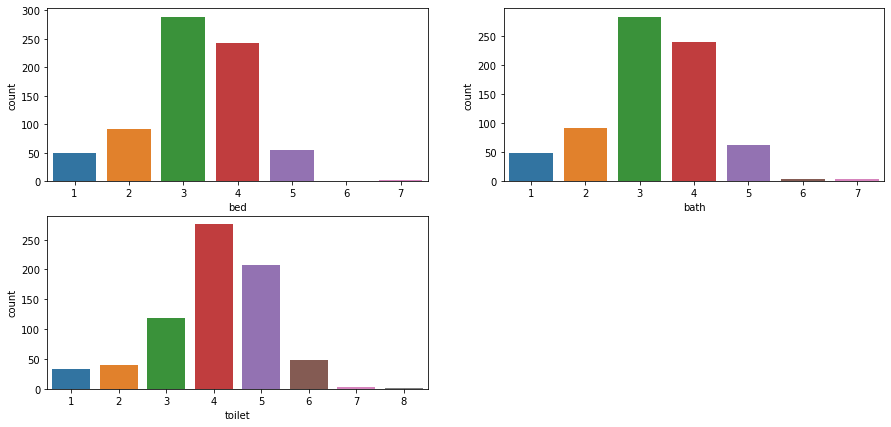

In [10]:
# Visualizing bedroom, bathroom, toilet &Parking space

fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(data['bed'])
fig.add_subplot(2,2,2)
sns.countplot(data['bath'])
fig.add_subplot(2,2,3)
sns.countplot(data['toilet'])


C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinte

<AxesSubplot:xlabel='toilet', ylabel='price'>

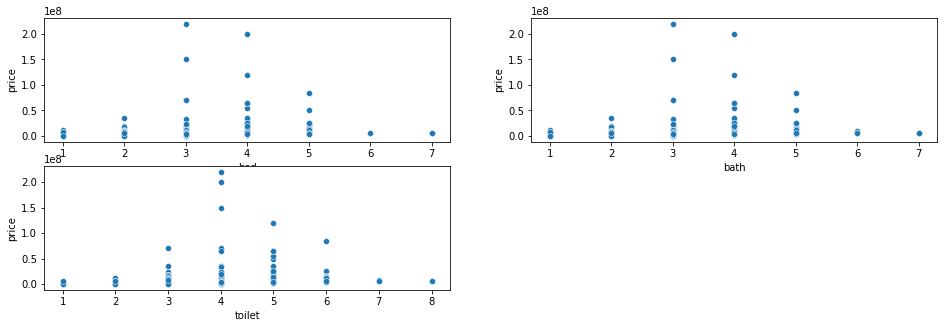

In [11]:
#visualizing some features distribution vs. price

fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(data['bed'], data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(data['bath'],data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(data['toilet'],data['price'])



                                         


## Dataset Preparation (Splitting and Scaling)

Data is divided into the Train set and Test set. We use the Train set to make the algorithm learn the data’s behavior and then check the accuracy of our model on the Test set. Features (X): The columns that are inserted into our model will be used to make predictions. Prediction (Y): Target variable that will be predicted by the features


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from keras.models import load_model
from keras.models import model_from_json
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [25]:
data = pd.read_csv("rent_right_data.csv")
data = data.drop('type',axis=1)
data = data.drop('area',axis=1)
data.head(5)


,bed,bath,toilet,price
0,2,2,2,1000000
1,5,5,6,4000000
2,4,4,5,3500000
3,4,4,5,5500000
4,4,4,5,4000000


In [26]:
print(data)

     bed  bath  toilet     price
0      2     2       2   1000000
1      5     5       6   4000000
2      4     4       5   3500000
3      4     4       5   5500000
4      4     4       5   4000000
..   ...   ...     ...       ...
726    5     4       4   3000000
727    4     4       4  20000000
728    3     3       4   2200000
729    3     3       4   3700000
730    2     2       2   6500000

[731 rows x 4 columns]


In [31]:
# split into input (X) and output (y) variables
X = data.iloc[:,0:3].values
y = data.iloc[:,3].values
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.25, random_state=1)

ValueError: Found input variables with inconsistent numbers of samples: [548, 731]

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(548, 3) (183, 3) (548,) (183,)


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# create model
model = Sequential()
model.add(Dense(3, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['MeanAbsoluteError','mse'])

In [38]:
# Training the Model
model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=10, epochs=40)
model.summary()

Epoch 1/40
55/55 [==============================] - 0s 6ms/step - loss: 8272443.0000 - mean_absolute_error: 8272443.0000 - mse: 285186533097472.0000 - val_loss: 9988060.0000 - val_mean_absolute_error: 9988060.0000 - val_mse: 358433240907776.0000
Epoch 2/40
55/55 [==============================] - 0s 2ms/step - loss: 8272440.0000 - mean_absolute_error: 8272440.0000 - mse: 285186432434176.0000 - val_loss: 9988060.0000 - val_mean_absolute_error: 9988060.0000 - val_mse: 358433240907776.0000
Epoch 3/40
55/55 [==============================] - 0s 2ms/step - loss: 8272442.0000 - mean_absolute_error: 8272442.0000 - mse: 285186398879744.0000 - val_loss: 9988060.0000 - val_mean_absolute_error: 9988060.0000 - val_mse: 358433240907776.0000
Epoch 4/40
55/55 [==============================] - 0s 2ms/step - loss: 8272441.0000 - mean_absolute_error: 8272441.0000 - mse: 285186465988608.0000 - val_loss: 9988060.0000 - val_mean_absolute_error: 9988060.0000 - val_mse: 358433240907776.0000
Epoch 5/40
55/55

55/55 [==============================] - 0s 2ms/step - loss: 8272403.5000 - mean_absolute_error: 8272403.5000 - mse: 285185962672128.0000 - val_loss: 9988023.0000 - val_mean_absolute_error: 9988023.0000 - val_mse: 358432603373568.0000
Epoch 35/40
55/55 [==============================] - 0s 2ms/step - loss: 8272402.5000 - mean_absolute_error: 8272402.5000 - mse: 285185929117696.0000 - val_loss: 9988022.0000 - val_mean_absolute_error: 9988022.0000 - val_mse: 358432569819136.0000
Epoch 36/40
55/55 [==============================] - 0s 2ms/step - loss: 8272399.0000 - mean_absolute_error: 8272399.0000 - mse: 285185828454400.0000 - val_loss: 9988019.0000 - val_mean_absolute_error: 9988019.0000 - val_mse: 358432536264704.0000
Epoch 37/40
55/55 [==============================] - 0s 2ms/step - loss: 8272400.0000 - mean_absolute_error: 8272400.0000 - mse: 285185895563264.0000 - val_loss: 9988016.0000 - val_mean_absolute_error: 9988016.0000 - val_mse: 358432469155840.0000
Epoch 38/40
55/55 [=====

In [39]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=32)


Epoch 1/150
18/18 [==============================] - 0s 7ms/step - loss: 8272389.5000 - mean_absolute_error: 8272389.5000 - mse: 285185727791104.0000 - val_loss: 9988009.0000 - val_mean_absolute_error: 9988009.0000 - val_mse: 358432402046976.0000
Epoch 2/150
18/18 [==============================] - 0s 3ms/step - loss: 8272388.5000 - mean_absolute_error: 8272388.5000 - mse: 285185761345536.0000 - val_loss: 9988009.0000 - val_mean_absolute_error: 9988009.0000 - val_mse: 358432334938112.0000
Epoch 3/150
18/18 [==============================] - 0s 2ms/step - loss: 8272388.5000 - mean_absolute_error: 8272388.5000 - mse: 285185727791104.0000 - val_loss: 9988009.0000 - val_mean_absolute_error: 9988009.0000 - val_mse: 358432334938112.0000
Epoch 4/150
18/18 [==============================] - 0s 2ms/step - loss: 8272387.0000 - mean_absolute_error: 8272387.0000 - mse: 285185727791104.0000 - val_loss: 9988009.0000 - val_mean_absolute_error: 9988009.0000 - val_mse: 358432334938112.0000
Epoch 5/150


18/18 [==============================] - 0s 3ms/step - loss: 8272362.5000 - mean_absolute_error: 8272362.5000 - mse: 285185358692352.0000 - val_loss: 9987984.0000 - val_mean_absolute_error: 9987984.0000 - val_mse: 358431932284928.0000
Epoch 35/150
18/18 [==============================] - 0s 4ms/step - loss: 8272361.5000 - mean_absolute_error: 8272361.5000 - mse: 285185392246784.0000 - val_loss: 9987983.0000 - val_mean_absolute_error: 9987983.0000 - val_mse: 358431932284928.0000
Epoch 36/150
18/18 [==============================] - 0s 4ms/step - loss: 8272360.5000 - mean_absolute_error: 8272360.5000 - mse: 285185291583488.0000 - val_loss: 9987982.0000 - val_mean_absolute_error: 9987982.0000 - val_mse: 358431932284928.0000
Epoch 37/150
18/18 [==============================] - 0s 3ms/step - loss: 8272359.5000 - mean_absolute_error: 8272359.5000 - mse: 285185258029056.0000 - val_loss: 9987981.0000 - val_mean_absolute_error: 9987981.0000 - val_mse: 358431898730496.0000
Epoch 38/150
18/18 [=

18/18 [==============================] - 0s 4ms/step - loss: 8272331.5000 - mean_absolute_error: 8272331.5000 - mse: 285184956039168.0000 - val_loss: 9987953.0000 - val_mean_absolute_error: 9987953.0000 - val_mse: 358431395414016.0000
Epoch 68/150
18/18 [==============================] - 0s 3ms/step - loss: 8272330.0000 - mean_absolute_error: 8272330.0000 - mse: 285184956039168.0000 - val_loss: 9987951.0000 - val_mean_absolute_error: 9987951.0000 - val_mse: 358431395414016.0000
Epoch 69/150
18/18 [==============================] - 0s 3ms/step - loss: 8272328.0000 - mean_absolute_error: 8272328.0000 - mse: 285184922484736.0000 - val_loss: 9987951.0000 - val_mean_absolute_error: 9987951.0000 - val_mse: 358431395414016.0000
Epoch 70/150
18/18 [==============================] - 0s 3ms/step - loss: 8272328.0000 - mean_absolute_error: 8272328.0000 - mse: 285184922484736.0000 - val_loss: 9987949.0000 - val_mean_absolute_error: 9987949.0000 - val_mse: 358431395414016.0000
Epoch 71/150
18/18 [=

18/18 [==============================] - 0s 3ms/step - loss: 8272293.5000 - mean_absolute_error: 8272293.5000 - mse: 285184486277120.0000 - val_loss: 9987918.0000 - val_mean_absolute_error: 9987917.0000 - val_mse: 358430824988672.0000
Epoch 101/150
18/18 [==============================] - 0s 4ms/step - loss: 8272291.5000 - mean_absolute_error: 8272291.5000 - mse: 285184419168256.0000 - val_loss: 9987915.0000 - val_mean_absolute_error: 9987915.0000 - val_mse: 358430791434240.0000
Epoch 102/150
18/18 [==============================] - 0s 3ms/step - loss: 8272290.5000 - mean_absolute_error: 8272290.5000 - mse: 285184385613824.0000 - val_loss: 9987914.0000 - val_mean_absolute_error: 9987914.0000 - val_mse: 358430791434240.0000
Epoch 103/150
18/18 [==============================] - 0s 3ms/step - loss: 8272290.5000 - mean_absolute_error: 8272290.5000 - mse: 285184385613824.0000 - val_loss: 9987913.0000 - val_mean_absolute_error: 9987913.0000 - val_mse: 358430757879808.0000
Epoch 104/150
18/1

Epoch 133/150
18/18 [==============================] - 0s 4ms/step - loss: 8272251.5000 - mean_absolute_error: 8272251.5000 - mse: 285183915851776.0000 - val_loss: 9987877.0000 - val_mean_absolute_error: 9987877.0000 - val_mse: 358430120345600.0000
Epoch 134/150
18/18 [==============================] - 0s 3ms/step - loss: 8272252.5000 - mean_absolute_error: 8272252.5000 - mse: 285183848742912.0000 - val_loss: 9987875.0000 - val_mean_absolute_error: 9987875.0000 - val_mse: 358430120345600.0000
Epoch 135/150
18/18 [==============================] - 0s 3ms/step - loss: 8272249.5000 - mean_absolute_error: 8272249.5000 - mse: 285183848742912.0000 - val_loss: 9987874.0000 - val_mean_absolute_error: 9987874.0000 - val_mse: 358430120345600.0000
Epoch 136/150
18/18 [==============================] - 0s 3ms/step - loss: 8272247.5000 - mean_absolute_error: 8272247.5000 - mse: 285183848742912.0000 - val_loss: 9987873.0000 - val_mean_absolute_error: 9987873.0000 - val_mse: 358430120345600.0000
Epoc

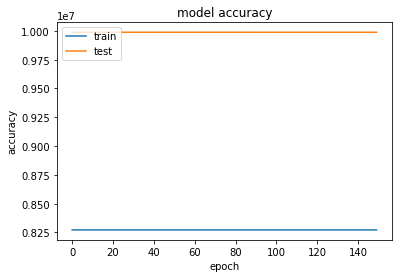

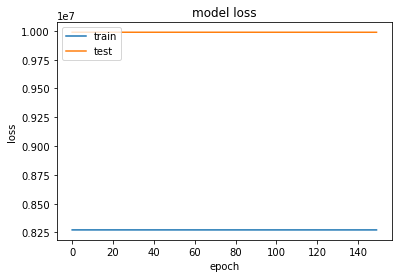

In [40]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [43]:
# evaluate the keras model
model.evaluate(X_train, y_train)[1]

18/18 [==============================] - 0s 1ms/step - loss: 8272228.0000 - mean_absolute_error: 8272228.0000 - mse: 285183580307456.0000


8272228.0

In [46]:
prediction = model.predict(X_test)


MAE: 9988032.027911775
MSE: 358432509451685.0
RMSE: 18932313.895868223
VarScore: 5.247562071541978e-07


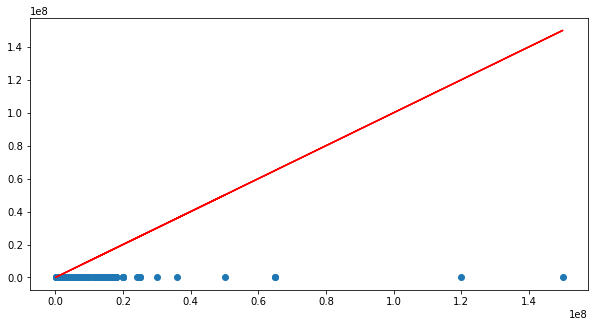

In [44]:
prediction = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [47]:
from keras.models import load_model

model.save('my_model.h5')
del model

# returns a compiled model identical to the previous one
model = load_model('my_model.h5')


In [48]:
model.to_json

<bound method Model.to_json of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000211ED8730D0>>

In [60]:
import tensorflowjs as tfjs

ModuleNotFoundError: No module named 'tensorflowjs'

In [58]:
tfjs.converters.save_keras_model(model)

AttributeError: module 'tensorflow' has no attribute 'converters'

In [62]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", 'w') as json_file:
    json_file.write(model_json)


In [63]:
# Saving weights of the model to HDF5
model.save_weights('model.h5')
print("Saved model to disk")

Saved model to disk


In [71]:
# load json and create model
json_file = open('model.json', 'r')
load_model_json = json_file.read()
json_file.close()
load_model = model_from_json(load_model_json)
# load weights into new model
load_model.load_weights("model.h5")
print("Load model from disk")


Load model from disk


In [72]:
# evaluate loaded model on test data
load_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = load_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (load_model.metrics_names[1], score[1]*100))

accuracy: 0.00%


In [73]:
import json

In [74]:
# read file
with open('model.json', 'r') as myfile:
    data=myfile.read()


In [75]:
# parse file
obj = json.loads(data)

In [76]:
print(obj)

{'class_name': 'Sequential', 'config': {'name': 'sequential_3', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 3], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_6_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense_6', 'trainable': True, 'batch_input_shape': [None, 3], 'dtype': 'float32', 'units': 3, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_7', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name'